# Displaying ZTF alerts

This short notebook shows how to open, explore and display information contained in an alert from ZTF. Alerts are serialised in Avro format.

**Pre-requisite**
- Python 3.5+
- fink_client 0.3+ with dependencies

**Additional information**
- ZTF alert schema described: https://zwickytransientfacility.github.io/ztf-avro-alert/
- Apache Avro: http://avro.apache.org/
- Fink documentation: https://fink-broker.readthedocs.io/en/latest/

In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

from fink_client.avro_utils import AlertReader
from fink_client.visualisation import show_stamps
from fink_client.visualisation import extract_field

In [2]:
# For plots
font = {
    'weight': 'bold',
    'size': 22
}

matplotlib.rc('font', **font)

# Bands
filter_color = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c'}
# [
#     '#1f77b4',  # muted blue
#     '#ff7f0e',  # safety orange
#     '#2ca02c',  # cooked asparagus green
#     '#d62728',  # brick red
#     '#9467bd',  # muted purple
#     '#8c564b',  # chestnut brown
#     '#e377c2',  # raspberry yogurt pink
#     '#7f7f7f',  # middle gray
#     '#bcbd22',  # curry yellow-green
#     '#17becf'   # blue-teal
# ]
filter_name = {1: 'g band', 2: 'r band', 3: 'i band'}

## Load alert data

ZTF alert data are serialised in Avro format. Since this format is not widely spread in the astronomy community, we provide the class `AlertReader` to ease the alert manipulation. You can pass to it a single alert file, or a folder containing alerts:

In [3]:
# The reader can read all alerts contained in a folder
r = AlertReader('../datatest')

The reader has methods to load data, and you will probably find useful the `to_pandas` method that loads alert data into a Pandas DataFrame:

In [4]:
# Store alert data in a Pandas DataFrame
df = r.to_pandas()

df

,schemavsn,publisher,objectId,candid,candidate,prv_candidates,cutoutScience,cutoutTemplate,cutoutDifference,timestamp,...,hour,cjd,cfid,cmagpsf,csigmapsf,cmagnr,csigmagnr,cmagzpsci,cisdiffpos,snn
0,3.3,ZTF (www.ztf.caltech.edu),ZTF19acihgng,1060135832015015002,"{'jd': 2458814.6358333, 'fid': 2, 'pid': 10601...","[{'jd': 2458785.6433218, 'fid': 2, 'pid': 1031...",{'fileName': 'candid1060135832015015002_pid106...,{'fileName': 'candid1060135832015015002_ref.fi...,{'fileName': 'candid1060135832015015002_pid106...,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.3,ZTF (www.ztf.caltech.edu),ZTF19acyjzeo,1079564896215015003,"{'jd': 2458834.0648958, 'fid': 1, 'pid': 10795...","[{'jd': 2458805.0150694, 'fid': 1, 'pid': 1050...",{'fileName': 'candid1079564896215015003_pid107...,{'fileName': 'candid1079564896215015003_ref.fi...,{'fileName': 'candid1079564896215015003_pid107...,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.3,ZTF (www.ztf.caltech.edu),ZTF19abbpaqb,1788116342915015046,"{'jd': 2459542.6163426, 'fid': 1, 'pid': 17881...","[{'jd': 2459517.6529167, 'fid': 1, 'pid': 1763...",{'fileName': 'candid1788116342915015046_pid178...,{'fileName': 'candid1788116342915015046_ref.fi...,{'fileName': 'candid1788116342915015046_pid178...,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.3,ZTF (www.ztf.caltech.edu),ZTF18acjzbxi,1788115871115010062,"{'jd': 2459542.6158796, 'fid': 1, 'pid': 17881...","[{'jd': 2459517.6538542, 'fid': 1, 'pid': 1763...",{'fileName': 'candid1788115871115010062_pid178...,{'fileName': 'candid1788115871115010062_ref.fi...,{'fileName': 'candid1788115871115010062_pid178...,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.3,ZTF (www.ztf.caltech.edu),ZTF18abecvir,1788110916115010009,"{'jd': 2459542.6109144, 'fid': 1, 'pid': 17881...","[{'jd': 2459517.6979051, 'fid': 1, 'pid': 1763...",{'fileName': 'candid1788110916115010009_pid178...,{'fileName': 'candid1788110916115010009_ref.fi...,{'fileName': 'candid1788110916115010009_pid178...,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.3,ZTF (www.ztf.caltech.edu),ZTF19acmbvwi,1034530232615015004,"{'jd': 2458789.0302315, 'fid': 2, 'pid': 10345...","[{'jd': 2458762.0077315, 'fid': 2, 'pid': 1007...",{'fileName': 'candid1034530232615015004_pid103...,{'fileName': 'candid1034530232615015004_ref.fi...,{'fileName': 'candid1034530232615015004_pid103...,2020-03-18 14:05:42.981000+00:00,...,15.0,"[2458762.0077315, 2458764.9943981, 2458765.017...","[2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2]","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[26.07309913635254, 26.042499542236328, 26.033...","[None, None, None, None, None, None, None, Non...",0.000000
6,3.3,ZTF (www.ztf.caltech.edu),ZTF19acmbuei,1034529320615015011,"{'jd': 2458789.0293287, 'fid': 2, 'pid': 10345...","[{'jd': 2458762.0048032, 'fid': 2, 'pid': 1007...",{'fileName': 'candid1034529320615015011_pid103...,{'fileName': 'candid1034529320615015011_ref.fi...,{'fileName': 'candid1034529320615015011_pid103...,2020-03-18 14:05:29.841000+00:00,...,15.0,"[2458762.0048032, 2458764.9948611, 2458765.018...","[2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2]","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[26.002700805664062, 25.97760009765625, 26.045...","[None, None, None, None, None, None, None, Non...",0.000000
7,3.3,ZTF (www.ztf.caltech.edu),ZTF19acbnumg,1034542624815015003,"{'jd': 2458789.0426273, 'fid': 2, 'pid': 10345...","[{'jd': 2458760.0012269, 'fid': 2, 'pid': 1005...",{'fileName': 'candid1034542624815015003_pid103...,{'fileName': 'candid1034542624815015003_ref.fi...,{'fileName': 'candid1034542624815015003_pid103...,2020-03-18 14:06:36.975000+00:00,...,15.0,"[2458760.0012269, 2458761.9653704, 2458763.939...","

Similarly, you have a method `to_list`, that loads the data into a list of dictionaries (each alert being a dictionary), or `to_iterator` that returns a generator.

**Exercise:** Explore the content of alerts. What information is available? You will find the description of each field at https://zwickytransientfacility.github.io/ztf-avro-alert/

# Display cutouts

You might have noticed the fields `cutout*` in each alert. These fields are 30x30 pixels image around the position of the alert. You have 3 such fields:
- `cutoutScience`: the observation made by ZTF
- `cutoutTemplate`: the reference image used to make the comparison with the observation
- `cutoutDifference`: The difference between the observation and the reference image.

ZTF19acihgng


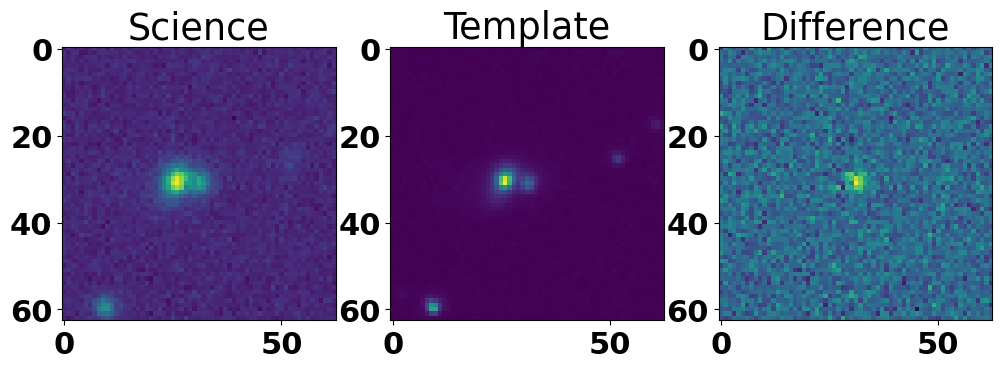

In [5]:
# Take the first alert
alert = r.to_list(size=1)[0]

# Display the cutouts contained in the alert
print(alert['objectId'])
fig = plt.figure(figsize=(12, 4))
show_stamps(alert, fig)

## Display lightcurve data

Each alert has the information about the current observation (field `candidate`), but it also contains historical information at the same location up to one month (field `prv_candidates`). This allows us to reconstruct the lightcurve for example. Note that we use the magnitude from PSF-fit photometry here (we could also have derived the apparent magnitude from the different fields)

In [6]:
# Load alert data
alerts = r.to_list()

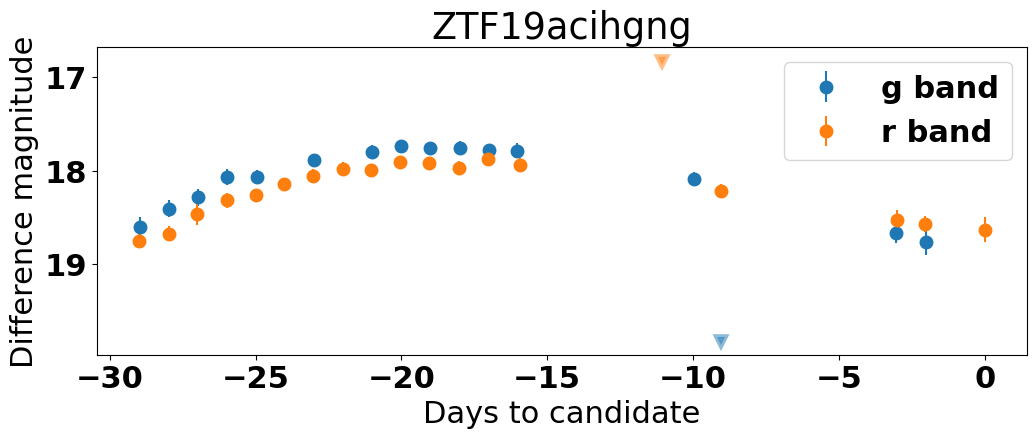

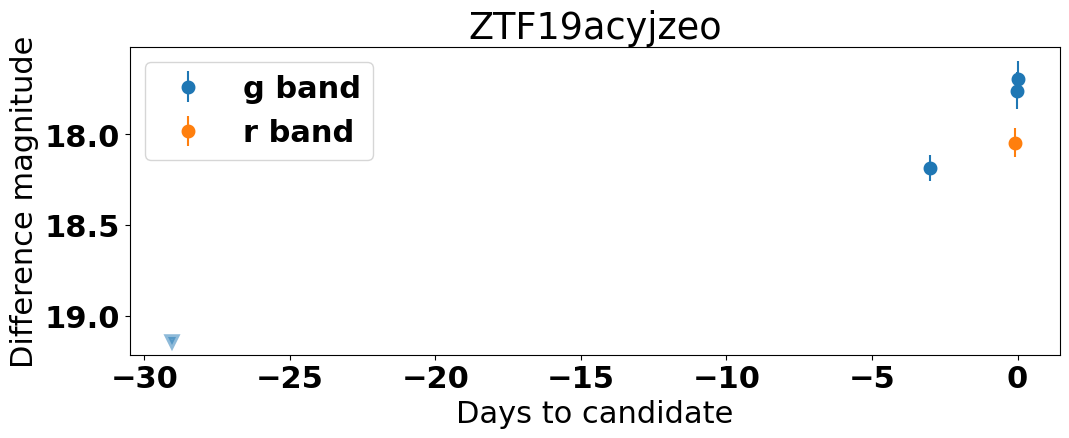

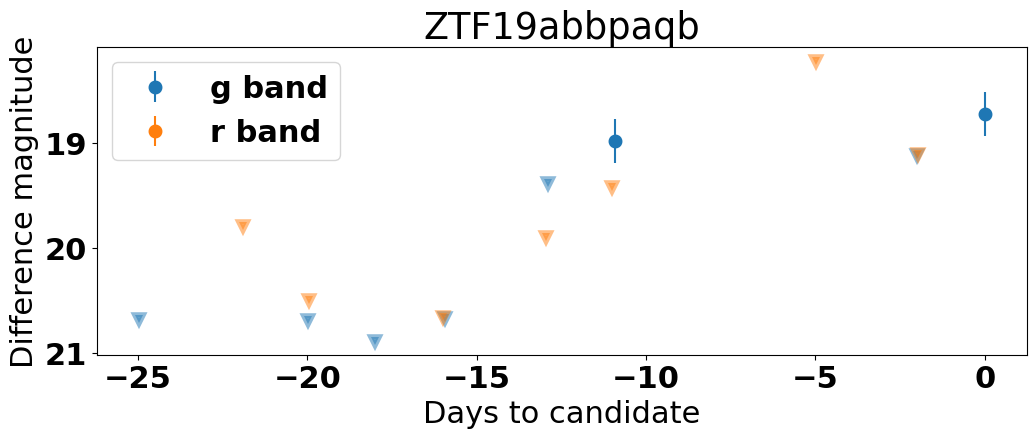

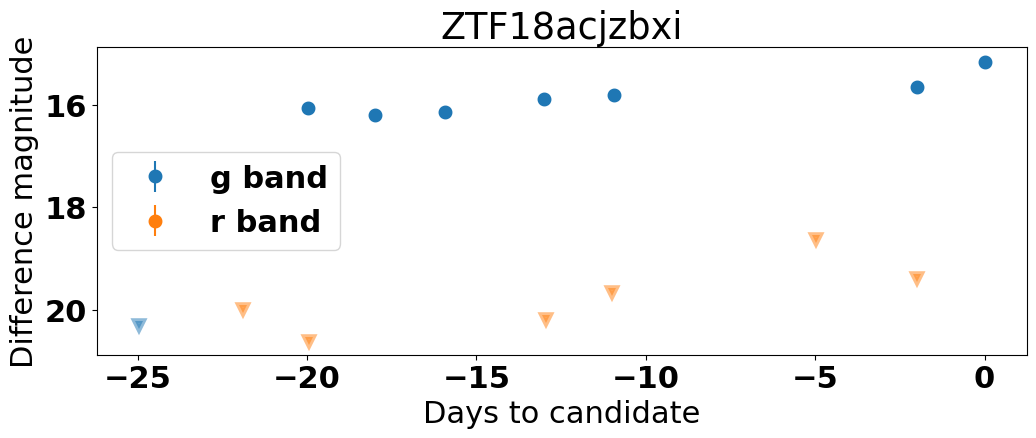

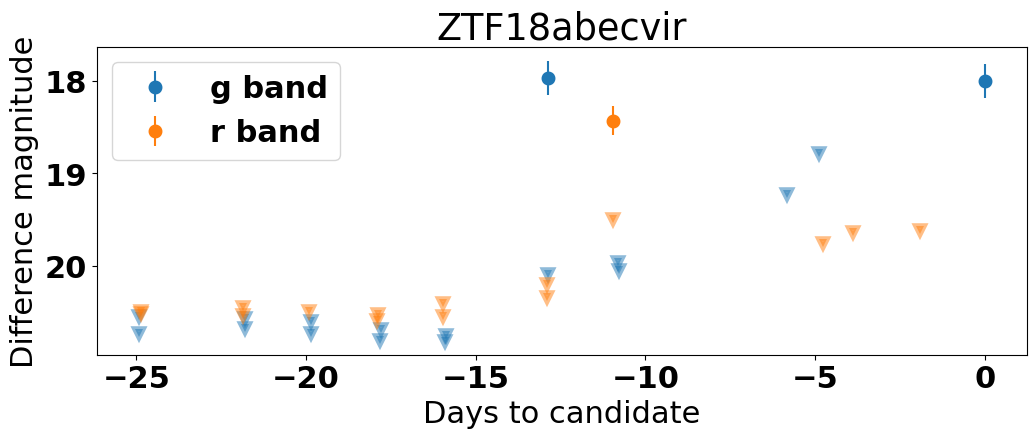

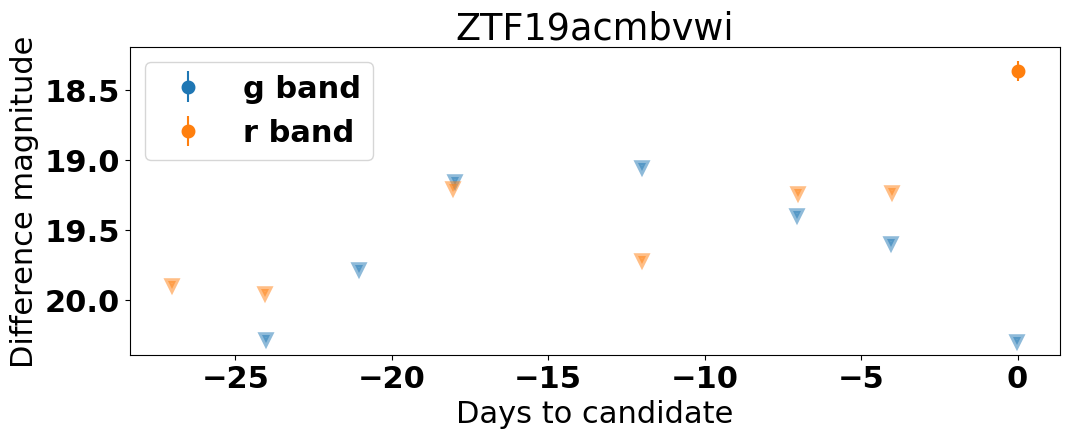

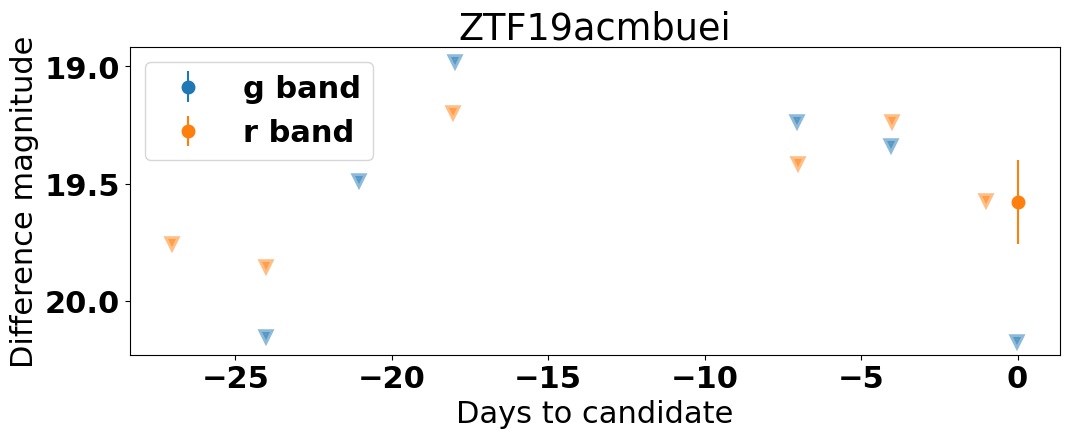

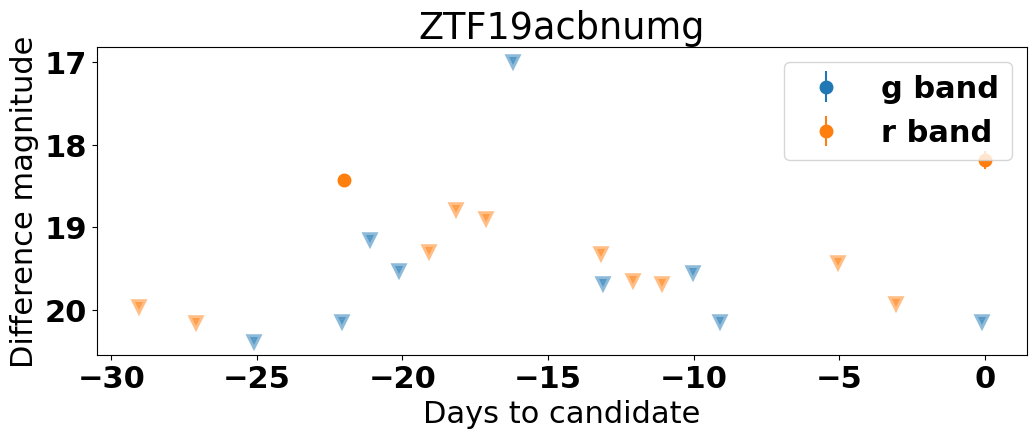

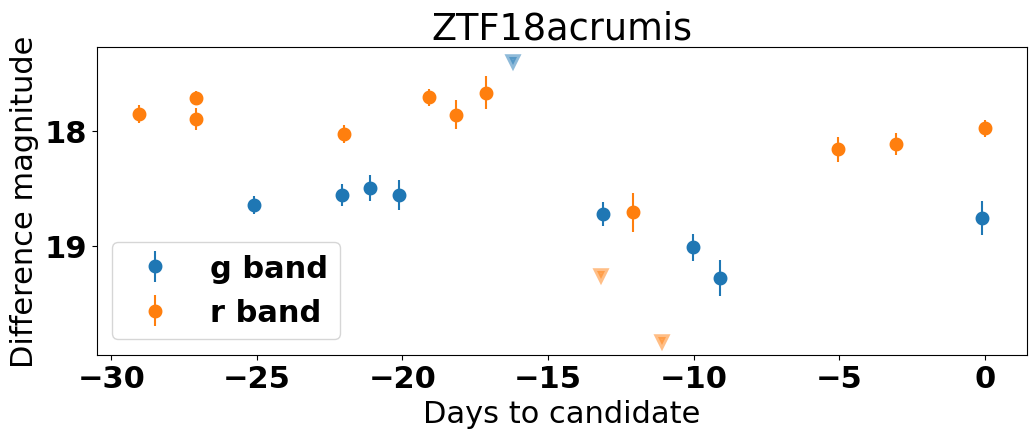

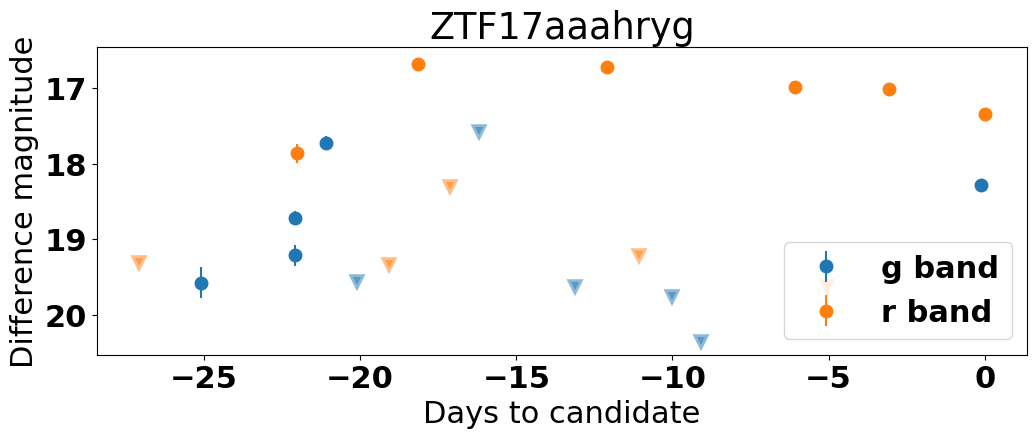

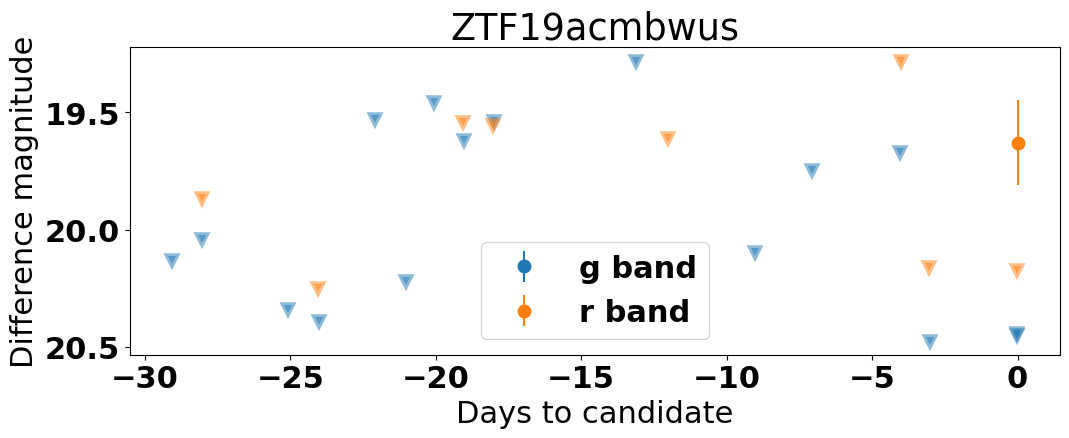

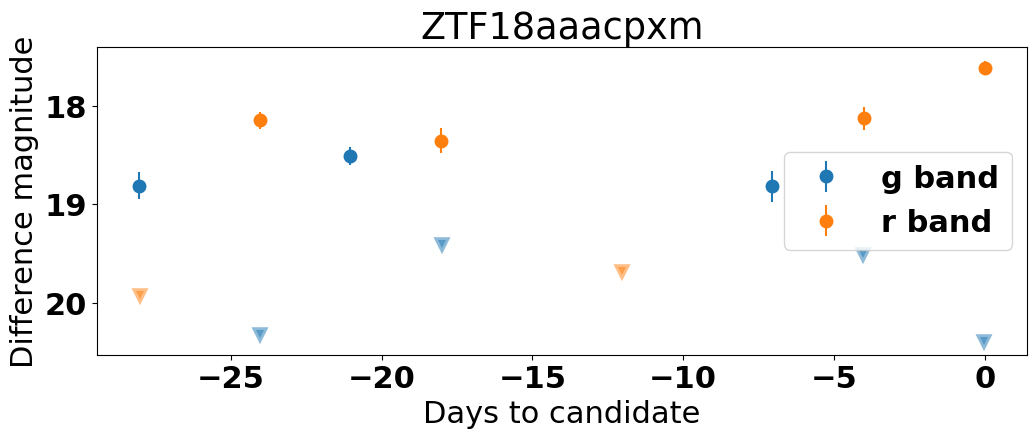

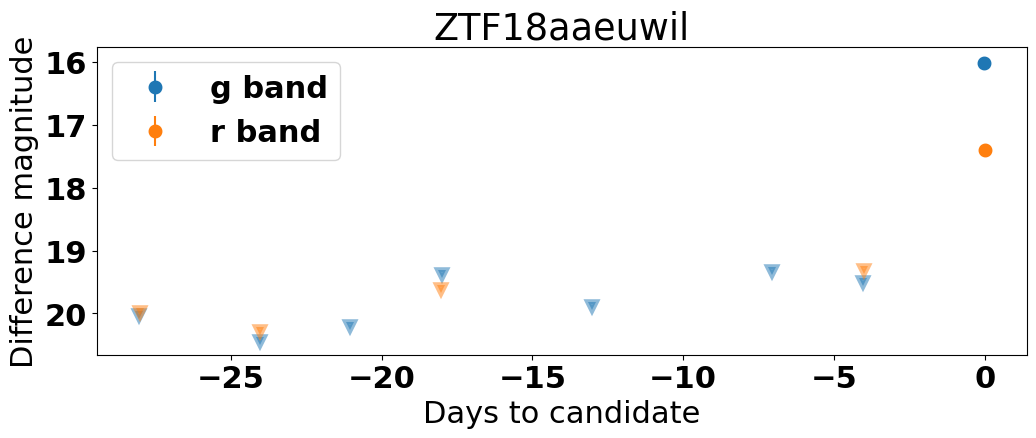

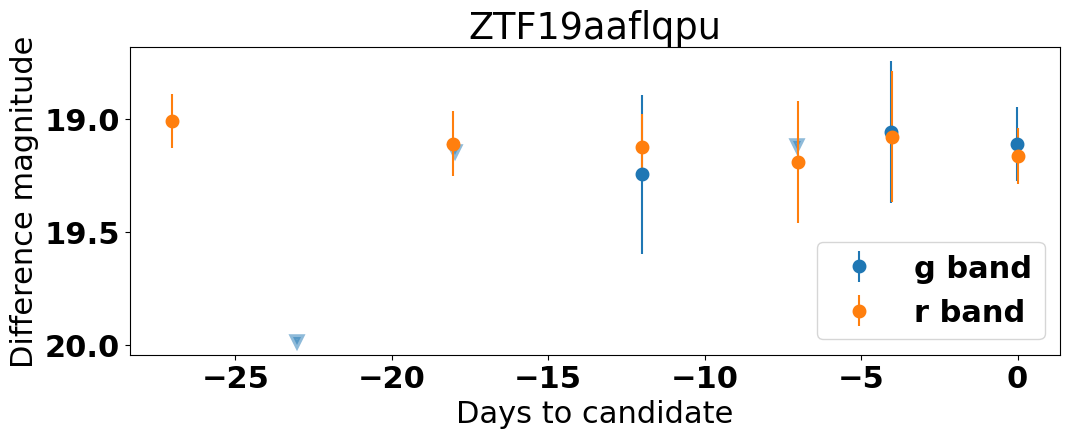

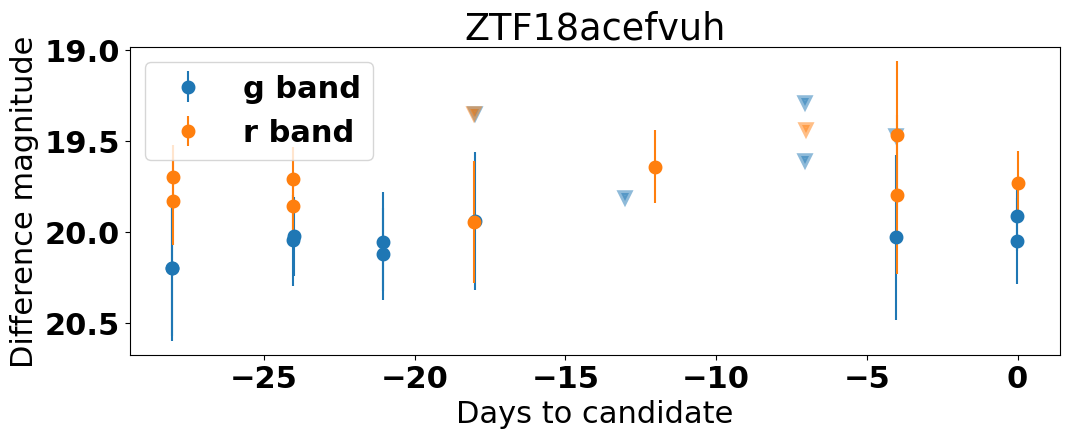

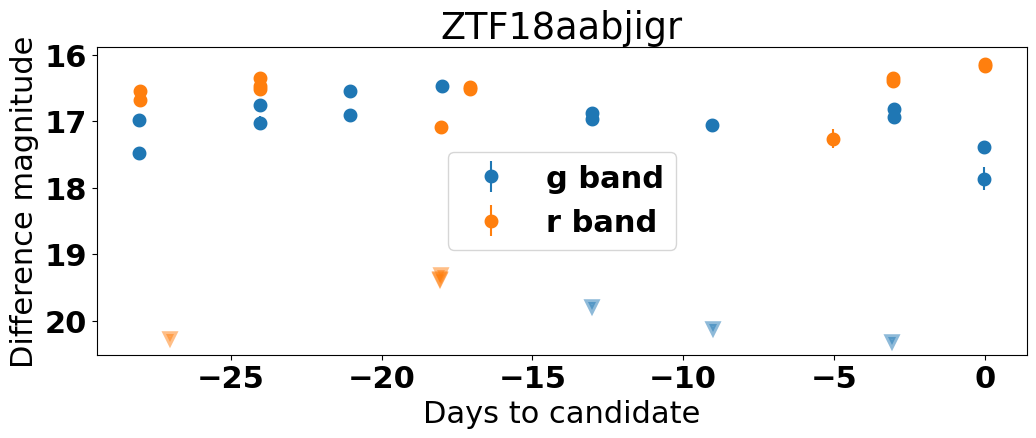

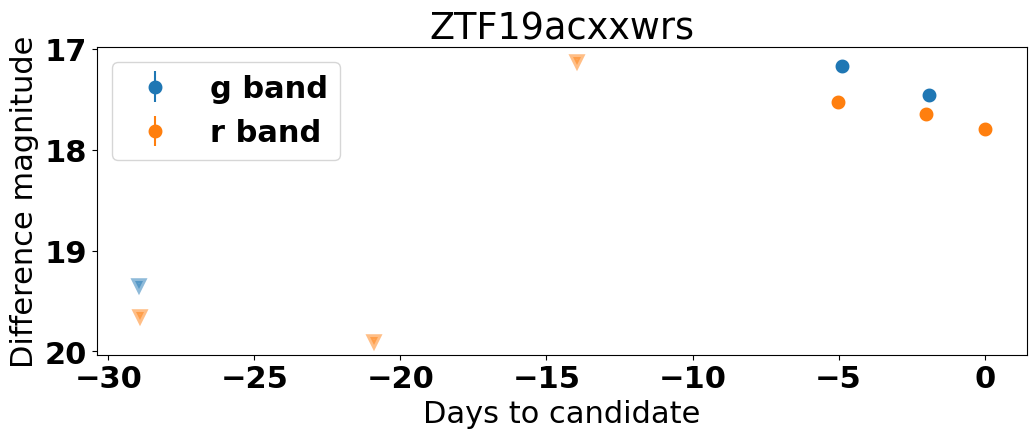

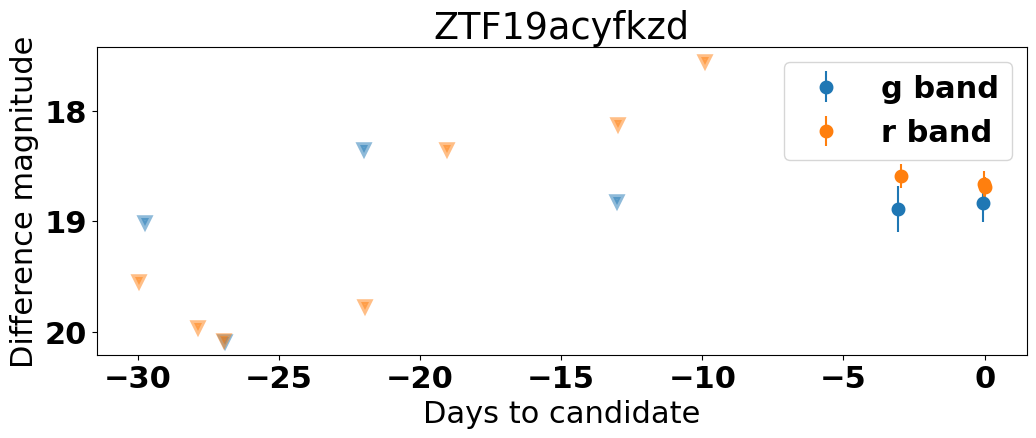

In [7]:
# and plot the difference magnitude as function of time. 
# Measurements and upper limits are treated separately.
for alert in alerts:
    # extract current and historical data as one vector
    mag = extract_field(alert, 'magpsf')
    error = extract_field(alert, 'sigmapsf')
    upper = extract_field(alert, "diffmaglim")
    
    # filter bands
    fid = extract_field(alert, "fid")
    
    # Rescale dates to end at 0
    jd = extract_field(alert, "jd")
    dates = np.array([i - jd[0] for i in jd])

    # Title of the plot (alert ID)
    title = alert["objectId"]

    # loop over filters
    fig = plt.figure(figsize=(12,4))
    
    # Loop over each filter
    for filt in filter_color.keys():
        mask = np.where(fid == filt)[0]
        
        # Skip if no data
        if len(mask) == 0:
            continue

        # y data
        maskNotNone = mag[mask] != None
        plt.errorbar(
            dates[mask][maskNotNone], mag[mask][maskNotNone], yerr=error[mask][maskNotNone], 
            color=filter_color[filt], marker='o', ls='', label=filter_name[filt], mew=4)
        # Upper limits
        plt.plot(
            dates[mask][~maskNotNone], upper[mask][~maskNotNone], 
            color=filter_color[filt], marker='v', ls='', mew=4, alpha=0.5)
        plt.title(title)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.xlabel('Days to candidate')
    plt.ylabel('Difference magnitude')
    plt.show()